### NLP Project
+ Emotion Detetcion in Text
+ Text Classifier


In [2]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [3]:
#Load Data Vix Pkgs
import seaborn as sns

In [4]:
#Load text Cleaning pkgs
import neattext.functions as nfx

In [10]:
# Load ML pPkgs
#Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#Transformers
from  sklearn.feature_extraction.text import CountVectorizer
from  sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [11]:
#Load Dataset
df = pd.read_csv("data/emotion_dataset_2.csv")

In [12]:
df.head()


,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [13]:
# Vlaue Counts
df['Emotion'].value_counts()

joy         4759
sadness     2800
fear        2268
anger       1844
surprise    1726
neutral      959
disgust      372
shame         56
Name: Emotion, dtype: int64

<AxesSubplot: xlabel='Emotion', ylabel='count'>

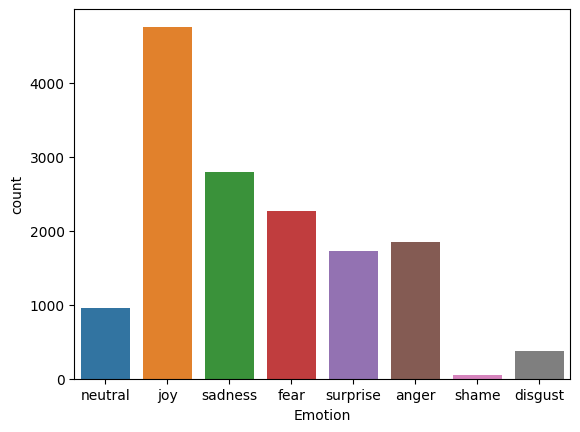

In [14]:
#plot
sns.countplot(x='Emotion',data=df)

In [15]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [19]:
#User Handles
df['Clean_Text']=df['Text'].apply(nfx.remove_userhandles)

In [20]:
#User StopWords
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_stopwords)

In [25]:
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,?
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...,...
14779,14779,joy,House is a sodding tip again! Looks like I'll ...,House sodding tip again! Looks like I'll spend...
14780,14780,neutral,I will .,.
14781,14781,fear,I went to the prayer meeting at night and unfo...,went prayer meeting night unfortunately car br...
14782,14782,neutral,How so ?,?


In [37]:
# Features & Lables
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [39]:
# Split data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [40]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [41]:
# LogisticRegression Pipeline
pipe_lr = Pipeline (steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [48]:
# Train and Fit data
pipe_lr.fit(x_train,y_train)

c:\users\sugam\microsoft python\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [50]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [49]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.5874661857529305

In [51]:
# Make Prediction
exl = " This book is sop interesting to read"

In [52]:
pipe_lr.predict([exl])

array(['joy'], dtype=object)

In [53]:
# prediction Probe
pipe_lr.predict_proba([exl])

array([[0.19435762, 0.01279073, 0.07436458, 0.38672786, 0.07552568,
        0.23704076, 0.00242919, 0.01676358]])

In [55]:
# To know The classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [56]:
# Save Model and Pipeline
import joblib 
pipeline_file = open("emotion_classifier_pipe_lr_30_10_2022.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()